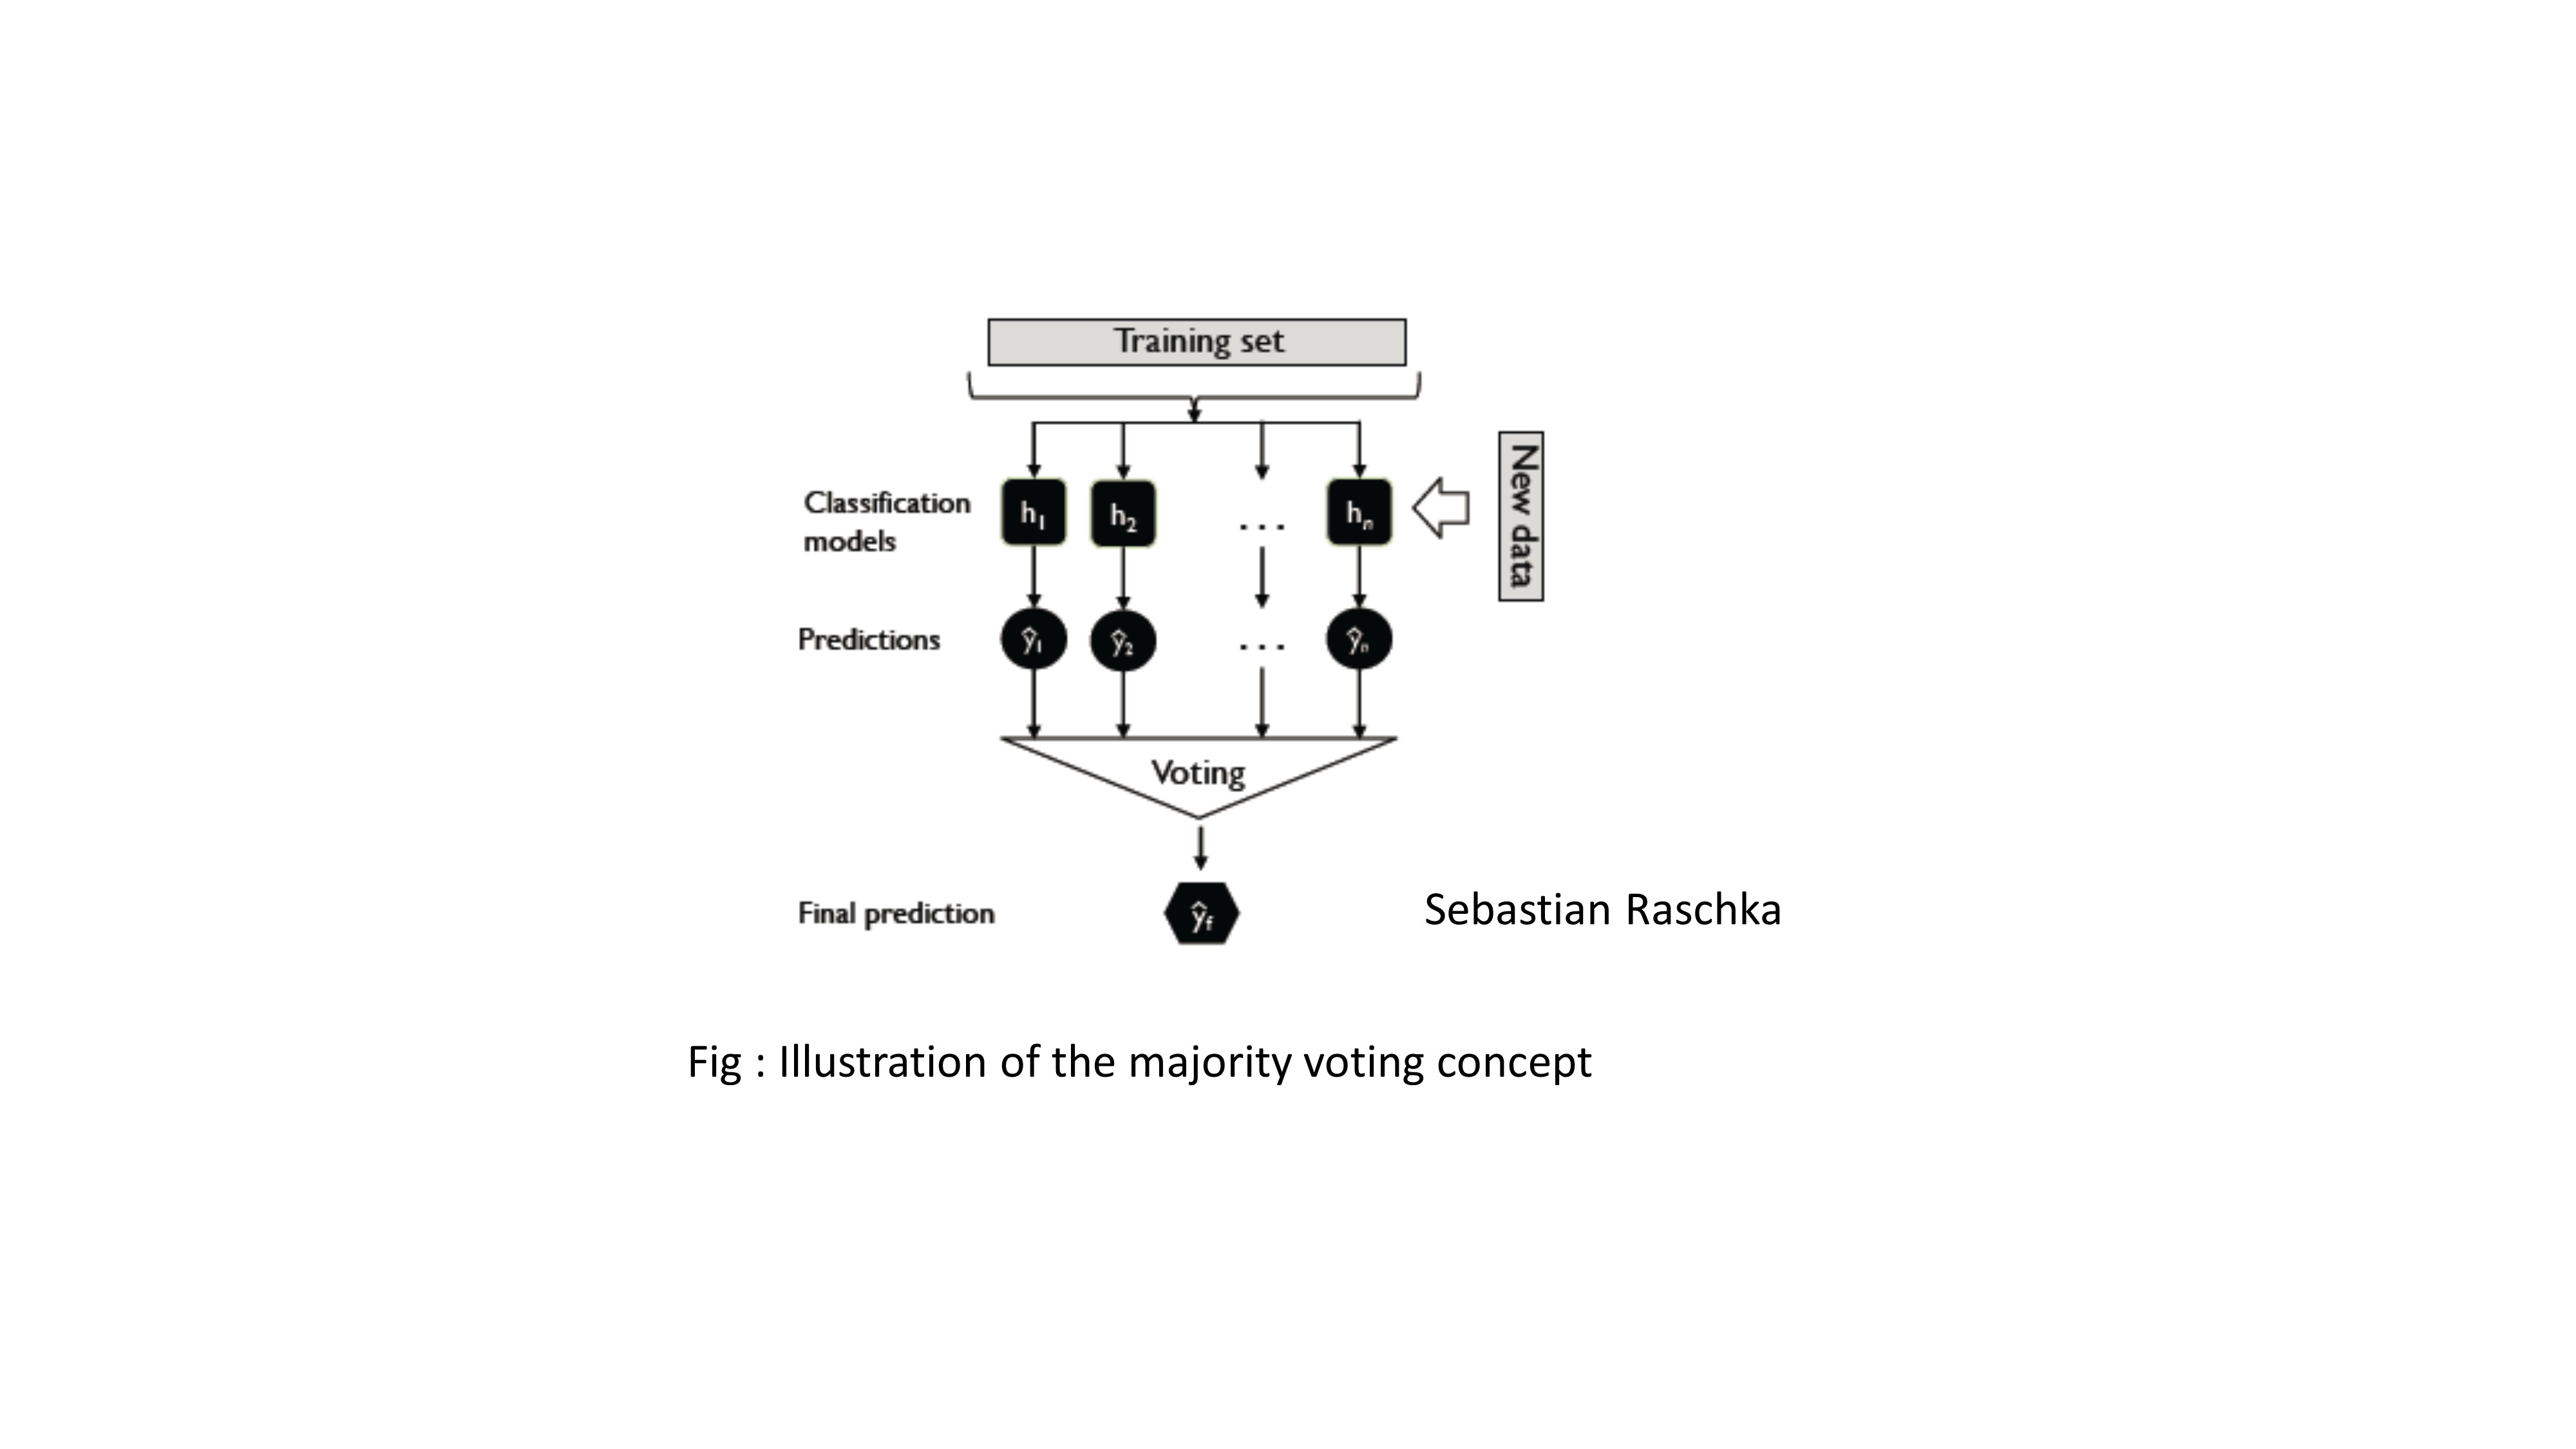
Suppose we have $n$ classifiers $h_{1},...,h_{n}$, and each of these classifiers make prediction $\hat{y}_{1},...,\hat{y}_{n}$ respectively. Considering each of the classiers has some accuracy, and we want to increase the accuracy. A convient way to create a better classifer is to average the predcitions of each classfier and predict class that gets the most vote :$$\hat{y}_{f} = \textit{mode}\{h_{1}(x),...,h_{n}(x)\}$$

Voting Classifier is of two types:<br>
  (1) Hard Voting: In this type, predicted output is based on the class which has a higest majority of vote<br> 
  (2) In this type, predicted output class with the higest class probability average over all the individual class
  

In [1]:
import numpy as np
import pandas as pd 
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier

#from sklearn.preprocessing import LabelEncoder
#from sklearn.ensemble import AdaBoostClassifier

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
iris = datasets.load_iris()
print(dir(iris))

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']


In [3]:
#X = pd.DataFrame(iris.data[:, 0:3], columns = iris.feature_names[0:3])
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns = ["Species"])

In [4]:
X.shape

(150, 4)

In [5]:
X.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [7]:
tree_clf1 = DecisionTreeClassifier(random_state=1)
tree_clf2 = DecisionTreeClassifier(max_depth=1, random_state=1)
tree_clf3 = DecisionTreeClassifier(max_depth=2, random_state=1)
tree_clf4 = DecisionTreeClassifier(max_depth=3, random_state=1)

## Hard voting

In [8]:
voting_clfh = VotingClassifier(estimators=[('dcTr1', tree_clf1), ('dcTr2', tree_clf2), ('dcTr3', tree_clf3), ('dcTr4', tree_clf4)], voting='hard')
voting_clfh.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('dcTr1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=1,
   

In [9]:
for clf in (tree_clf1, tree_clf2, tree_clf3, tree_clf4, voting_clfh):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.9666666666666667
DecisionTreeClassifier 0.5666666666666667
DecisionTreeClassifier 0.9666666666666667
DecisionTreeClassifier 0.9666666666666667
VotingClassifier 0.9666666666666667


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


We can see from the above figure, Classifier 2 did not perfome cpmapared to other two classfiers but the voting classifier pefrom better than or same as classifier 1 and 2.


## Soft Voting 

In [10]:
voting_clfs = VotingClassifier(estimators=[('dcTr1', tree_clf1), ('dcTr2', tree_clf2), ('dcTr3', tree_clf3), ('dcTr4', tree_clf4)], voting='soft')
voting_clfs.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('dcTr1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=1,
   

In [12]:
for clf in (tree_clf1, tree_clf2, tree_clf3, tree_clf4, voting_clfs):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.9666666666666667
DecisionTreeClassifier 0.5666666666666667
DecisionTreeClassifier 0.9666666666666667
DecisionTreeClassifier 0.9666666666666667
VotingClassifier 0.9666666666666667


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


## Soft Voting with weights 

In [14]:
voting_clfsw = VotingClassifier(estimators=[('dcTr1', tree_clf1), ('dcTr2', tree_clf2), ('dcTr3', tree_clf3), ('dcTr4', tree_clf4)], voting='soft', weights=[1,2,1,1], flatten_transform=True)
voting_clfsw.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


VotingClassifier(estimators=[('dcTr1',
                              DecisionTreeClassifier(ccp_alpha=0.0,
                                                     class_weight=None,
                                                     criterion='gini',
                                                     max_depth=None,
                                                     max_features=None,
                                                     max_leaf_nodes=None,
                                                     min_impurity_decrease=0.0,
                                                     min_impurity_split=None,
                                                     min_samples_leaf=1,
                                                     min_samples_split=2,
                                                     min_weight_fraction_leaf=0.0,
                                                     presort='deprecated',
                                                     random_state=1,
   

In [15]:
for clf in (tree_clf1, tree_clf2, tree_clf3, tree_clf4, voting_clfsw):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

DecisionTreeClassifier 0.9666666666666667
DecisionTreeClassifier 0.5666666666666667
DecisionTreeClassifier 0.9666666666666667
DecisionTreeClassifier 0.9666666666666667
VotingClassifier 0.9666666666666667


C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\User\anaconda3\lib\site-packages\sklearn\preprocessing\_label.py:268: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
